In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
E = 100.
R1 = np.linspace(1,200,1000)
Rm = 20.
R2 = 10.
R3 = 100.
Ra = 1e-3

The loop below solves the system of equations for a Wheatstone bridge, not ignoring the voltage drop of the ammeter. The purpose is to find the point where the bridge is balanced (ammeter current equals zero), and then to calculate Rm and compare it with the value provided.

In [0]:
for col, r1 in enumerate(R1):
  currents = np.empty((3, len(R1)))
  res_mat = np.array([[r1, -Rm, -(Rm+Ra)],
                      [R3, -R2, (R3+Ra)],
                      [0., (Rm + R2), Rm]])
  volt_mat = np.array([0., 0., E])
  currents[:, col] = np.linalg.solve(res_mat, volt_mat)
  current_sample = currents[2, 0]
  currents = np.nan_to_num(currents)
  #current = np.linalg.solve(res_mat, volt_mat)
# for i in range(1, len(R1)):
#   diff = np.empty(len(R1) - 1)
#   diff[i-1] = np.abs(currents[2, i] - currents[2, i-1])
#   #diff = np.nan_to_num(diff)

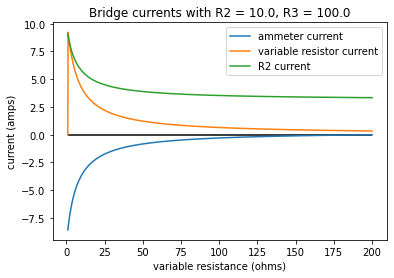

In [586]:
plt.plot(R1, currents[2, :], label='ammeter current')
plt.plot(R1, currents[0, :], label='variable resistor current')
plt.plot(R1, currents[1, :], label='R2 current')
plt.hlines(0, R1.min(), R1.max())
plt.xlabel('variable resistance (ohms)')
plt.ylabel('current (amps)')
plt.title(f'Bridge currents with R2 = {R2}, R3 = {R3}')
plt.legend()

The solution has high frequency oscillations without converting the NaN values prior to plotting. The code below is only required when these oscillations are not filtered out. Every odd-numbered index is a normal value.

In [0]:
min = np.infty
for i in range(len(currents[2])):
  if i % 2 != 0:
      num = np.abs(currents[2, i])
      if num != np.nan:
        val = num
    #print(val)
        if val < min:
         min = val
      #print(min)

In [0]:
# r1 = R1[np.abs(currents[2])==min]
r1 = R1[np.abs(currents[2]).argmin()]

In [589]:
rm = r1 * R2/R3
rm

20.0

As the values for R2 and R3 increase, less current is sent through the ammeter. If R2 and R3 remain balanced, an accurate reading can still be obtained, but the current through the ammeter will bw smaller and smaller and at some point it will approach the accuracy of the ammeter.

If R2 is large compared to R3, then an accurate reading can still result. If R3 is large compared to R2, then the reading will not be accurate if R3 is close to the max value of R1. Increasing the max value of R1 corrects this. The value of R1 needs to always be able to be greater than or equal to Rm.

The voltage supply can be increased to increase the current through the ammeter.

In [553]:
np.abs(currents[2]).argmin()

999

In [476]:
currents[2, 999]

-0.025973545294778633

In [477]:
R1[999]

100.0